In [1]:
import sys
import os
# go to upper diretory
sys.path.append(os.path.abspath('./../../'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from tabulate import tabulate
from sklearn.preprocessing import minmax_scale
from Audio_Sentiment_Analysis.utils.Configuration import Configuration

In [2]:
EXTRACTED_FEATURES_FILE = 'extracted_features_ent05.csv'
SCALED_FEATURES = 'scaled_features.csv'
CONFIG_FILE = f"{os.path.abspath('./../../')}/Audio_Sentiment_Analysis/data/config.json"
config = Configuration.load_json(CONFIG_FILE)
pd.options.display.max_columns = None

### Load the processed features writen in the dataset

In [3]:
df = pd.read_csv(EXTRACTED_FEATURES_FILE)
print(df.shape)
df = df.sort_values(['Subject', 'Emotion', 'Gender'], ascending = (True, True, True))
df = df.set_index('Subject')
df

(1287, 37)


,File,Gender,Emotion,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,mean_chroma_stft,mean_rms,mean_spectral_centroid,mean_spectral_contrast,mean_spectral_bandwidth,mean_spectral_rolloff,mean_zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,s1_an_1,m,anger,0,5.470246,4.425599e-10,2683.060303,2835.492676,53.249344,0.402497,0.129479,1814.026368,22.718679,1834.495092,3811.157227,0.093647,-171.056549,115.938042,-28.566433,21.314878,-26.507704,10.144446,-22.394417,-6.446075,-20.058737,-9.614691,-15.731797,-8.805967,-2.915169,-12.226694,-5.387331,-4.913489,-9.523164,-1.791623,-3.507744,0.083974
1,s1_an_2,m,anger,0,4.795431,3.266728e-10,1598.459473,1602.659546,40.033230,0.369817,0.122001,1813.929245,22.243432,1772.517500,3602.609923,0.095251,-187.978119,114.721764,-41.258282,22.174334,-12.715221,11.881122,-22.636301,-9.284857,-23.113138,-7.031469,-15.980973,-11.601790,-5.727098,-6.378960,-7.155037,-7.385511,-8.306025,4.346861,-6.595266,-2.742662
1,s1_an_3,m,anger,0,3.334237,3.032449e-10,689.850159,542.464478,23.290867,0.402758,0.093039,1699.189320,21.846660,1764.541591,3558.226103,0.089708,-241.878052,123.269180,-36.750164,15.108225,-17.863935,12.198894,-16.139629,-8.320073,-9.156641,-3.037857,-7.307014,-2.118013,-5.378597,-6.666719,-4.749491,-4.346241,-5.281549,3.802923,-7.263710,3.085279
1,s1_an_4,m,anger,0,7.300478,3.510179e-10,3062.532715,4610.922363,67.903770,0.272837,0.155781,1578.663080,23.566948,1679.770568,3222.159447,0.068912,-166.445877,122.271973,-42.199047,19.365204,-21.122906,8.933196,-21.792807,-10.018277,-22.990004,-9.038509,-19.050367,-9.762542,0.404813,-14.561901,-6.730536,-4.809193,-5.546733,2.948940,-6.117626,-3.003350
1,s1_an_5,m,anger,0,6.344573,4.247520e-10,4932.327637,6391.681152,79.947990,0.312011,0.140534,1577.596083,23.661057,1621.112545,3149.887457,0.072095,-180.083939,119.054886,-42.182270,26.999893,-6.590927,8.636041,-17.951384,-20.642817,-24.792248,-4.610571,-18.438587,-11.906023,-3.913879,-11.295942,-3.214928,-6.571509,-0.506520,1.930403,-6.855783,-2.346526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,s43_su_1,m,surprise,5,0.769080,7.201543e-10,343.847076,67.194626,8.197233,0.331168,0.044888,2052.206978,21.497085,2161.771189,4606.111654,0.079783,-336.866089,92.766159,-11.945115,21.954580,-17.095549,14.651039,-26.619282,-25.634380,-13.413041,-14.144950,-5.024631,6.116760,-10.426900,0.831624,2.825282,-2.409575,-10.828930,-1.298723,-8.621070,-5.182373
43,s43_su_2,m,surprise,5,0.556107,5.498184e-10,230.432190,23.537954,4.851593,0.380171,0.039031,2454.031082,20.405096,2270.482310,5048.431866,0.118452,-319.413849,81.346947,-16.686415,29.972387,-6.042555,16.341099,-33.199039,-16.532486,-12.359121,-4.888298,-6.806832,-1.223010,-10.650027,1.095915,-2.858048,-0.077681,-17.657349,0.739707,-8.174618,-4.075395
43,s43_su_3,m,surprise,5,0.683379,5.204141e-10,321.460266,51.769161,7.195079,0.365656,0.038733,1934.732410,20.800297,2094.752776,4009.003906,0.082415,-408.904541,100.005859,11.742913,30.391819,0.775768,5.303309,-9.461466,-7.890242,-14.330964,-8.491887,-8.745173,-6.608298,-4.951917,-3.810073,-2.735772,2.905826,-10.721315,-3.930346,-6.022038,-7.872016


### Min Max Scaling all features
### Store Scaled features in a new file

In [5]:
df[df.columns[3:]] = minmax_scale(df[df.columns[3:]], config.scale_range)
df.to_csv(SCALED_FEATURES)
df

,File,Gender,Emotion,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,mean_chroma_stft,mean_rms,mean_spectral_centroid,mean_spectral_contrast,mean_spectral_bandwidth,mean_spectral_rolloff,mean_zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,s1_an_1,m,anger,0.0,0.749187,0.226190,0.543893,0.383464,0.619121,0.528081,0.827658,0.195442,0.740029,0.298054,0.316421,0.181458,0.917193,0.695340,0.521300,0.425891,0.345490,0.606309,0.534112,0.498706,0.482930,0.380977,0.235475,0.421656,0.488674,0.201833,0.260923,0.350065,0.261784,0.296907,0.501349,0.324593
1,s1_an_2,m,anger,0.0,0.656711,0.166961,0.323958,0.216739,0.465380,0.436557,0.778661,0.195401,0.672130,0.251716,0.264627,0.188436,0.874480,0.684851,0.405515,0.436568,0.542730,0.633834,0.529863,0.432751,0.416103,0.431380,0.227772,0.347832,0.408824,0.319372,0.228203,0.271015,0.289062,0.479564,0.406021,0.246796
1,s1_an_3,m,anger,0.0,0.456470,0.154987,0.139710,0.073361,0.270617,0.528811,0.588888,0.146191,0.615444,0.245752,0.253604,0.164317,0.738427,0.758562,0.446642,0.348791,0.469100,0.638870,0.643966,0.455166,0.721455,0.509304,0.495930,0.598252,0.418720,0.313588,0.272729,0.368205,0.356845,0.463378,0.385383,0.407198
1,s1_an_4,m,anger,0.0,1.000000,0.179403,0.620843,0.623567,0.789595,0.164950,1.000000,0.094499,0.861221,0.182372,0.170140,0.073816,0.928831,0.749963,0.396932,0.401672,0.422495,0.587112,0.544678,0.415711,0.418798,0.392219,0.132880,0.396398,0.582953,0.154896,0.236060,0.353401,0.350902,0.437967,0.420769,0.239621
1,s1_an_5,m,anger,0.0,0.869004,0.217088,1.000000,0.864392,0.929704,0.274662,0.900099,0.094041,0.874666,0.138516,0.152191,0.087667,0.894406,0.722219,0.397085,0.496512,0.630310,0.582402,0.612145,0.168864,0.379367,0.478617,0.151794,0.339799,0.460314,0.220541,0.301134,0.297045,0.463861,0.407659,0.397978,0.257698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,s43_su_1,m,surprise,1.0,0.104944,0.368067,0.069548,0.009087,0.095035,0.328314,0.273384,0.297594,0.565500,0.542745,0.513851,0.121123,0.498659,0.495512,0.672933,0.433838,0.480089,0.677735,0.459910,0.052892,0.628330,0.292583,0.566491,0.815692,0.275362,0.464305,0.412938,0.430135,0.232520,0.311573,0.343475,0.179648
43,s43_su_2,m,surprise,1.0,0.075758,0.281009,0.046549,0.003183,0.056115,0.465554,0.235008,0.469930,0.409488,0.624024,0.623704,0.289405,0.542712,0.397035,0.629679,0.533437,0.638152,0.704521,0.344348,0.264362,0.651389,0.473198,0.511393,0.621884,0.269026,0.469617,0.307740,0.504705,0.079485,0.372229,0.357259,0.210115
43,s43_su_3,m,surprise,1.0,0.093199,0.265981,0.065008,0.007001,0.083377,0.424903,0.233055,0.247211,0.465950,0.492638,0.365557,0.132576,0.316821,0.557945,0.889035,0.538648,0.735657,0.529581,0.761255,0.465153,0.608247,0.402885,0.451469,0.479686,0.430837,0.371007,0.310003,0.600111,0.234932,0.233267,0.423720,0.105621


## Querying data
### - Group by subject and emotions and calculate the respective mean values

In [6]:
df.groupby(['Subject', 'Emotion']).mean()

Emotion_Id  mel_mean   mel_min   mel_max   mel_var  \
Subject Emotion                                                         
1       anger             0.0  0.746274  0.188926  0.525681  0.432305   
        disgust           0.2  0.301552  0.177212  0.258473  0.085171   
        fear              0.4  0.282142  0.195931  0.237384  0.128988   
        happiness         0.6  0.492395  0.246755  0.280682  0.188731   
        sadness           0.8  0.117414  0.187126  0.125337  0.013165   
...                       ...       ...       ...       ...       ...   
43      disgust           0.2  0.035277  0.289814  0.034453  0.001488   
        fear              0.4  0.012437  0.268931  0.007282  0.000157   
        happiness         0.6  0.079350  0.320658  0.049911  0.005026   
        sadness           0.8  0.006228  0.252608  0.003523  0.000043   
        surprise          1.0  0.078906  0.286287  0.060701  0.005649   

                    mel_std  mean_chroma_stft  mean_rms  \
Subject Emotion                                           
1       anger      0.614884          0.386612  0.819061   
        disgust    0.270858          0.511966  0.462770   
        fear       0.281034          0.372663  0.434195   
        happiness  0.406150          0.446137  0.646510   
        sadness    0.113835          0.537471  0.264625   
...                     ...               ...       ...   
43      disgust    0.037251          0.470173  0.130449   
        fear       0.010742          0.495348  0.070626   
        happiness  0.069877          0.356619  0.234656   
        sadness    0.005779          0.691901  0.037661   
        surprise   0.073453          0.465339  0.219347   

                   mean_spectral_centroid  mean_spectral_contrast  \
Subject Emotion                                                     
1       anger                    0.145115                0.752698   
        disgust                  0.363861                0.626821   
        fear                     0.222595                0.721394   
        happiness                0.270214                0.615791   
        sadness                  0.240283                0.560694   
...                                   ...                     ...   
43      disgust                  0.583450                0.422639   
        fear                     0.496191                0.398168   
        happiness                0.425793                0.597318   
        sadness                  0.547289                0.205531   
        surprise                 0.360114                0.436099   

                   mean_spectral_bandwidth  mean_spectral_rolloff  \
Subject Emotion                                                     
1       anger                     0.223282               0.231397   
        disgust                   0.386140               0.434645   
        fear                      0.311584               0.323331   
        happiness                 0.359825               0.360447   
        sadness                   0.393362               0.377942   
...                                    ...                    ...   
43      disgust                   0.742661               0.737710   
        fear                      0.721687               0.660993   
        happiness                 0.514633               0.507876   
        sadness                   0.762513               0.691863   
        surprise                  0.567200               0.506185   

                   mean_zero_crossing_rate     mfcc1     mfcc2     mfcc3  \
Subject Emotion                                                            
1       anger                     0.139139  0.870668  0.722187  0.433495   
        disgust                   0.371535  0.728126  0.560748  0.529976   
        fear                      0.188896  0.687709  0.635249  0.561925   
        happiness                 0.251319  0.841867  0.622308  0.499888   
        sadness                   0.226766  0.585

### Group by emotions and calculate the respective mean values

In [10]:
emotion_df = df.groupby(['Emotion']).mean()
emotion_df

,Emotion_Id,mel_mean,mel_min,mel_max,mel_var,mel_std,mean_chroma_stft,mean_rms,mean_spectral_centroid,mean_spectral_contrast,mean_spectral_bandwidth,mean_spectral_rolloff,mean_zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
Emotion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
anger,0.0,0.268770,0.254518,0.158889,0.063700,0.191203,0.443797,0.423197,0.275551,0.547289,0.365328,0.353937,0.221293,0.646034,0.611030,0.527170,0.459442,0.547004,0.444674,0.612285,0.527574,0.511114,0.480349,0.461575,0.545584,0.433820,0.366132,0.252728,0.460658,0.252692,0.324140,0.405216,0.270288
disgust,0.2,0.148310,0.276574,0.098113,0.030279,0.120932,0.500078,0.283478,0.441134,0.480760,0.502082,0.524096,0.364925,0.563209,0.471857,0.620223,0.479231,0.542205,0.556249,0.555682,0.584166,0.550963,0.497136,0.537677,0.578754,0.432657,0.418956,0.272438,0.491652,0.275408,0.371165,0.390246,0.297805
fear,0.4,0.150794,0.282765,0.095859,0.040563,0.126500,0.442405,0.273724,0.386461,0.501970,0.494152,0.485858,0.287621,0.524971,0.479053,0.634103,0.529637,0.548533,0.579593,0.609917,0.581011,0.575110,0.516863,0.500735,0.555271,0.411094,0.408143,0.272255,0.491740,0.278326,0.348445,0.389616,0.293177
happiness,0.6,0.230514,0.280493,0.141114,0.062179,0.180351,0.472642,0.377594,0.389377,0.503503,0.435408,0.457166,0.327963,0.622047,0.505392,0.558088,0.441869,0.517489,0.518255,0.547035,0.556880,0.542349,0.515364,0.512105,0.527150,0.393490,0.400714,0.277871,0.471560,0.279951,0.380115,0.405937,0.288905
sadness,0.8,0.059617,0.271755,0.047848,0.007586,0.053430,0.529608,0.151340,0.382754,0.417240,0.532777,0.508841,0.287832,0.409269,0.525426,0.701378,0.534444,0.569420,0.644816,0.655460,0.620533,0.623026,0.549245,0.590223,0.604299,0.453114,0.430164,0.278474,0.514876,0.286716,0.360282,0.407477,0.303585
surprise,1.0,0.161122,0.293521,0.100185,0.033537,0.128476,0.500540,0.293261,0.312776,0.468335,0.436771,0.413503,0.246238,0.541951,0.590321,0.627015,0.462238,0.534525,0.530426,0.584236,0.537678,0.599954,0.523220,0.553716,0.551120,0.393550,0.404137,0.283050,0.460078,0.261759,0.335888,0.396316,0.271065


### Group by genders and emotions and calculate the respective mean values

In [11]:
df.groupby(['Gender', 'Emotion']).mean()

Emotion_Id  mel_mean   mel_min   mel_max   mel_var  \
Gender Emotion                                                         
f      anger             0.0  0.213191  0.218110  0.140127  0.047116   
       disgust           0.2  0.161643  0.231661  0.110270  0.039377   
       fear              0.4  0.142713  0.226525  0.101703  0.038123   
       happiness         0.6  0.213478  0.232576  0.131843  0.040700   
       sadness           0.8  0.048299  0.225986  0.053720  0.006865   
       surprise          1.0  0.168497  0.231517  0.114974  0.029202   
m      anger             0.0  0.279578  0.261597  0.162537  0.066925   
       disgust           0.2  0.145718  0.285307  0.095749  0.028510   
       fear              0.4  0.152366  0.293700  0.094722  0.041037   
       happiness         0.6  0.233883  0.289968  0.142947  0.066427   
       sadness           0.8  0.061818  0.280655  0.046707  0.007726   
       surprise          1.0  0.159688  0.305577  0.097309  0.034380   

                   mel_std  mean_chroma_stft  mean_rms  \
Gender Emotion                                           
f      anger      0.164365          0.391727  0.361009   
       disgust    0.138528          0.464032  0.293971   
       fear       0.131814          0.369002  0.264988   
       happiness  0.161628          0.431328  0.376324   
       sadness    0.055361          0.420849  0.136651   
       surprise   0.141309          0.430574  0.303800   
m      anger      0.196421          0.453922  0.435289   
       disgust    0.117511          0.507087  0.281438   
       fear       0.125466          0.456678  0.275423   
       happiness  0.184053          0.480811  0.377845   
       sadness    0.053054          0.550755  0.154196   
       surprise   0.125981          0.514144  0.291212   

                  mean_spectral_centroid  mean_spectral_contrast  \
Gender Emotion                                                     
f      anger                    0.329048                0.467433   
       disgust                  0.479458                0.413336   
       fear                     0.457975                0.459879   
       happiness                0.411890                0.444227   
       sadness                  0.426313                0.376028   
       surprise                 0.321219                0.422657   
m      anger                    0.265149                0.562817   
       disgust                  0.433682                0.493870   
       fear                     0.372556                0.510155   
       happiness                0.384925                0.515224   
       sadness                  0.374285                0.425254   
       surprise                 0.311135                0.477217   

                  mean_spectral_bandwidth  mean_spectral_rolloff  \
Gender Emotion                                                     
f      anger                     0.395867               0.406150   
       disgust                   0.531681               0.565730   
       fear                      0.527184               0.553196   
       happiness                 0.415984               0.463386   
       sadness                   0.573683               0.568072   
       surprise                  0.414518               0.420355   
m      anger                     0.359390               0.343784   
       disgust                   0.496327               0.516000   
       fear                      0.487729               0.472765   
       happiness                 0.439248               0.455936   
       sadness                   0.524823               0.497324   
       surprise                  0.441098               0.412170   

                  mean_zero_crossing_rate     mfcc1     mfcc2     mfcc3  \
Gender Emotion                                                            
f      anger                     0.255733  0.577707  0.521919  0.499164   
       disgust                   0.389377  0.553027  0.409696  0.

## Feature Analysis

### Bar Plots of Mel Spectogram Values

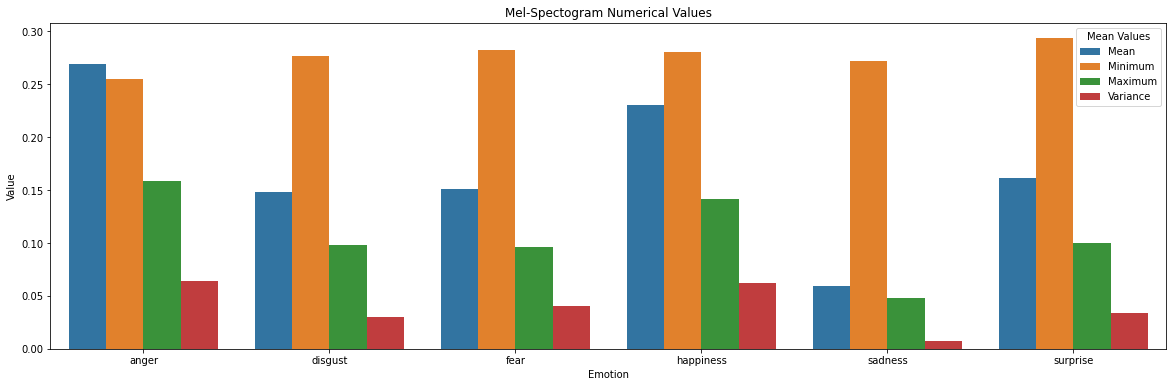

In [12]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Mean"]*6+["Minimum"]*6+["Maximum"]*6+["Variance"]*6+["Standard Deviation"]*6,
        list(emotion_df['mel_mean'].values)+list(emotion_df['mel_min'].values)+list(emotion_df['mel_max'].values)+\
            list(emotion_df['mel_var'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
plt.title("Mel-Spectogram Numerical Values")
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of Spectral Values

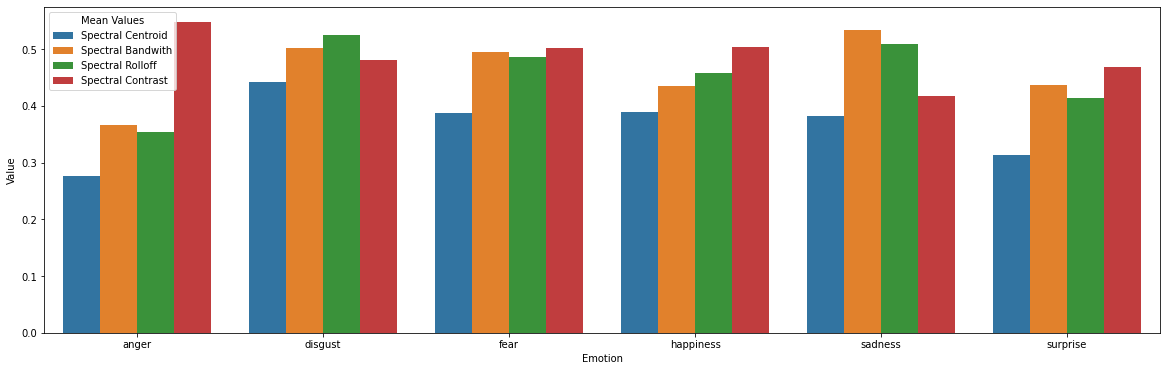

In [14]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Spectral Centroid"]*6+["Spectral Bandwith"]*6+
            ["Spectral Rolloff"]*6+["Spectral Contrast"]*6,
        list(emotion_df['mean_spectral_centroid'].values)+list(emotion_df['mean_spectral_bandwidth'].values)+\
            list(emotion_df['mean_spectral_rolloff'].values)+list(emotion_df['mean_spectral_contrast'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of other Features

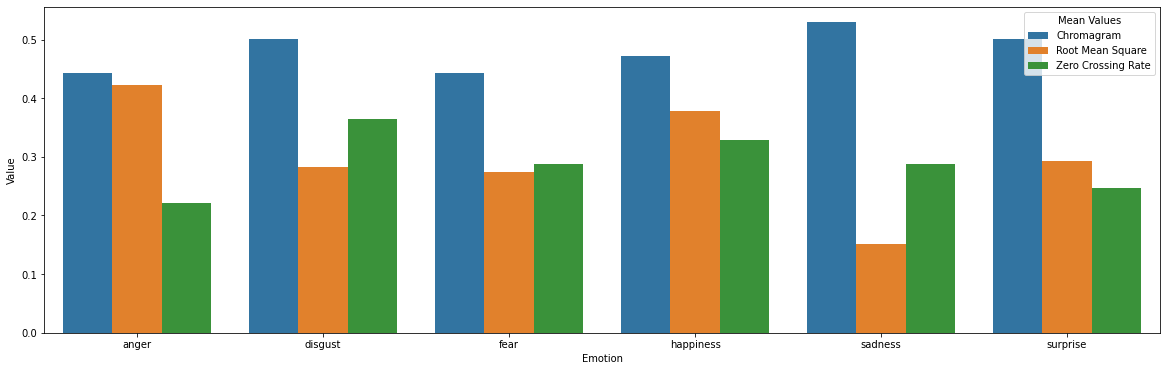

In [16]:
df_barplot = pd.DataFrame(
    zip(
        list(emotion_df.index.values)*6,
        ["Chromagram"]*6+["Root Mean Square"]*6+["Zero Crossing Rate"]*6,
        list(emotion_df['mean_chroma_stft'].values)+list(emotion_df['mean_rms'].values)+list(emotion_df['mean_zero_crossing_rate'].values)
    ),
    columns=["Emotion", "Mean Values", 'Value']
)

plt.figure(figsize=(20, 6))
sns.barplot(x="Emotion", hue="Mean Values", y="Value", data=df_barplot)
plt.show()

### Bar Plots of MFCC Values

## Features' Correlation with Emotion

In [17]:
df_corr = abs(df.corr()["Emotion_Id"]).sort_values()
display_html(tabulate(df_corr.items(), headers=["Feature", "Correlation Value"], tablefmt="html"), raw=True)

Feature,Correlation Value
mfcc5,0.00345004
mean_spectral_centroid,0.00397181
mfcc20,0.00774941
mfcc19,0.00978996
mfcc16,0.0169484
mfcc12,0.0196251
mfcc2,0.0238198
mean_zero_crossing_rate,0.0246027
mfcc18,0.0251572
mfcc7,0.0315541


# Single Feature Analysis


In [18]:
def analyse_feature(df_corr, feature):
    print(f"{feature} Correlation to Emotion: {df_corr[feature]:0.04f}")
    print(f"Position {list(df_corr.index).index(feature)} out of {len(df_corr)-1} features")

    fig = plt.figure(figsize=(20, 11))
    fig.suptitle(feature, fontsize=18)

    grid = plt.GridSpec(3, 6, wspace=.6, hspace=.4)
    y_ticks = np.arange(0.0, 1.1, 0.1)

    ax = plt.subplot(grid[0, :])
    ax.set_title("For All Subjects")
    sns.boxplot(x=df["Emotion"], y=df[feature], width=0.3, ax=ax)
    ax.set_yticks(y_ticks)

    for i in range(1,6):
        if i < 3:
            r, c_s, c_f = 1, (i-1)*3, (i-1)*3+3
        else:
            r, c_s, c_f = 2, (i-3)*2, (i-3)*2+2

        ax = plt.subplot(grid[r, c_s:c_f])
        ax.set_title(f"For Subject {i}")
        subj_data = df.loc[df.index == i]
        sns.boxplot(x=subj_data["Emotion"], y=subj_data[feature], width=0.3, ax=ax);
        ax.set_yticks(y_ticks)

    plt.show()

## Zero Crossing Rate Analysis

mean_zero_crossing_rate Correlation to Emotion: 0.0246
Position 7 out of 32 features


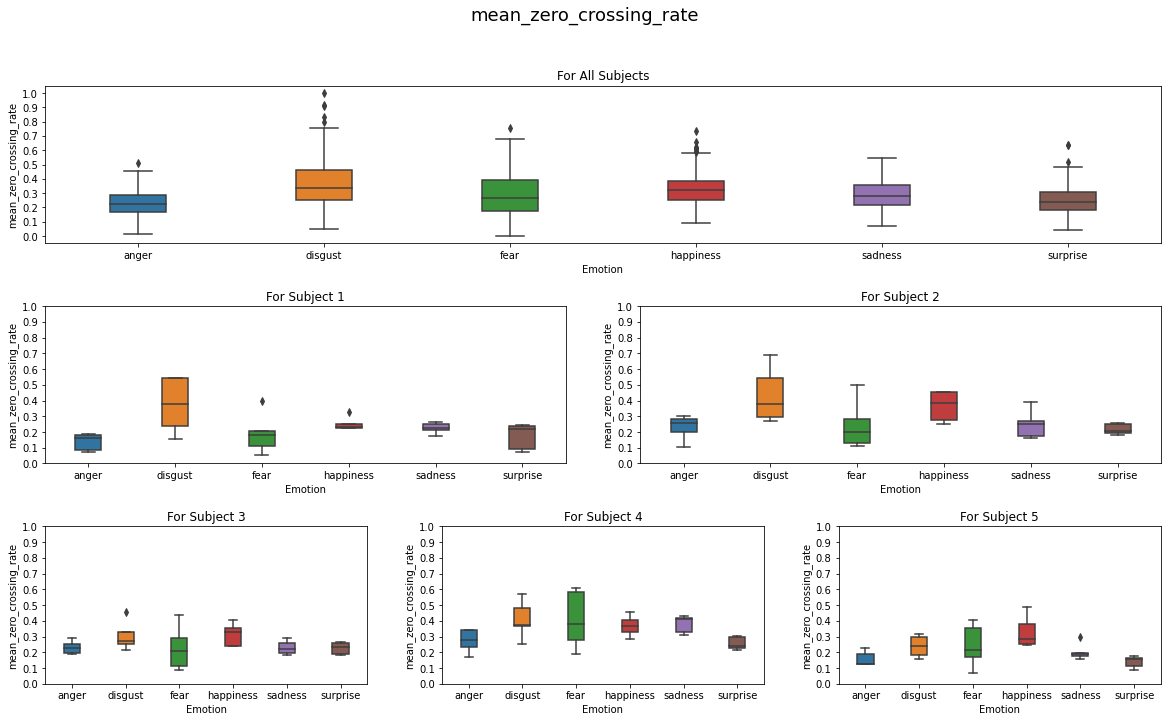

In [19]:
analyse_feature(df_corr, "mean_zero_crossing_rate")

## Root Mean Square Energy Analysis

mean_rms Correlation to Emotion: 0.2241
Position 30 out of 32 features


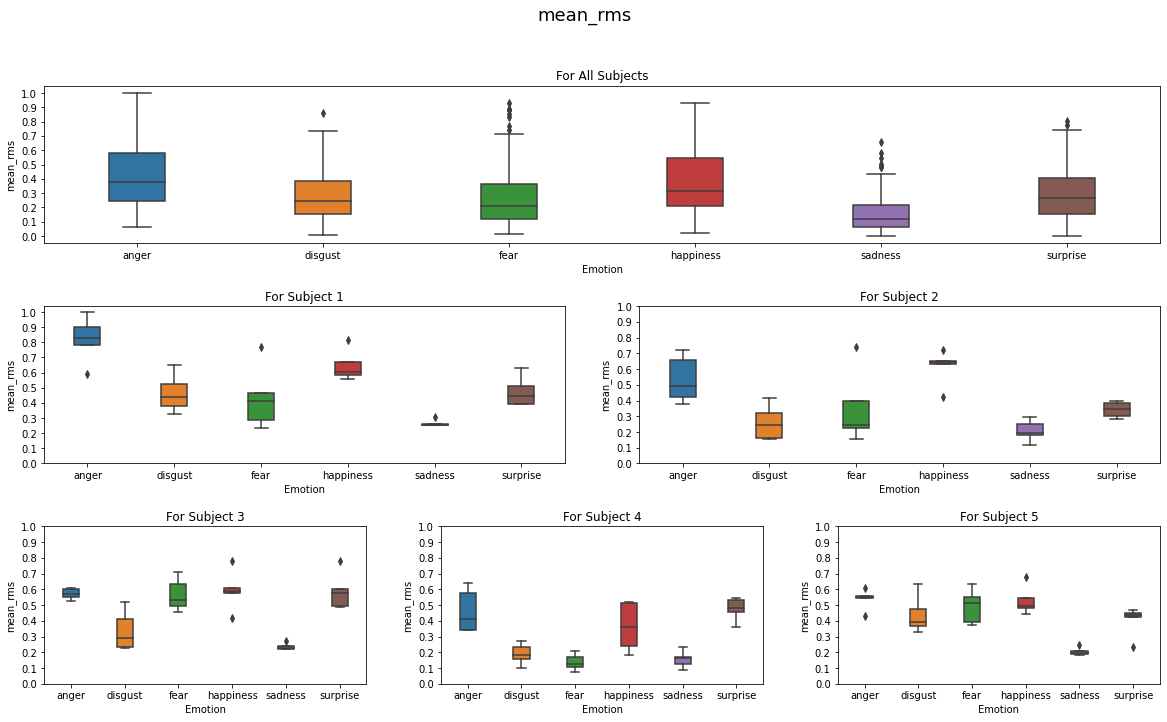

In [20]:
analyse_feature(df_corr, "mean_rms")